In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [82]:
df_sm = pd.read_csv('branchy.csv', index_col=0)
df_th = pd.read_csv('name.csv', index_col=0)

df_th.loc[(df_th['exit'] == 0)]

,threshold,test,exit,sample,exited,correct,confidence,time
0,0.1,0.0,0.0,0.0,1.0,1.0,0.980662,957.6605
4,0.1,0.0,0.0,1.0,1.0,1.0,0.798491,6.0821
8,0.1,0.0,0.0,2.0,1.0,1.0,0.826576,4.3385
12,0.1,0.0,0.0,3.0,1.0,1.0,0.979569,4.3576
16,0.1,0.0,0.0,4.0,1.0,1.0,0.983452,4.7223
20,0.1,0.0,0.0,5.0,1.0,1.0,0.974083,4.3822
24,0.1,0.0,0.0,6.0,1.0,1.0,0.999717,5.4747
28,0.1,0.0,0.0,7.0,1.0,1.0,0.999841,4.6212
32,0.1,0.0,0.0,8.0,1.0,1.0,0.718434,4.4329
36,0.1,0.0,0.0,9.0,1.0,1.0,0.270686,5.3525


In [78]:
th_num_exited_at_exit = []
th_exit_acc = []
th_exit_acc_if_exited = []
th_false_if_exited = []
th_time = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_time = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==1)])/n_exited)
        exit_n_false.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct']==1)])/500)
        
    th_num_exited_at_exit.append(exit_n_frac)
    th_exit_acc.append(exit_n_acc)
    th_false_if_exited.append(exit_n_false)
    th_exit_acc_if_exited.append(exit_n_acc_exited)
    th_time.append(exit_time)
    
    tmp = df_th.loc[(df_th['exit'] == exit)]
    exit_time.append(tmp['time'])
    
sm_num_exited_at_exit = []
sm_exit_acc = []
sm_exit_acc_if_exited = []
sm_false_if_exited = []
sm_time = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==1)])/n_exited)
        exit_n_false.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct']==1)])/500)
        tmp = df_sm.loc[(df_sm['threshold']== t) & (df_sm['exit'] == exit)]
        exit_time.append(tmp['time'])
    sm_num_exited_at_exit.append(exit_n_frac)
    sm_exit_acc.append(exit_n_acc)
    sm_false_if_exited.append(exit_n_false)
    sm_exit_acc_if_exited.append(exit_n_acc_exited)
    sm_time.append(exit_time)

In [30]:
x = np.arange(0.1, 1, 0.1)

## exit accuracy

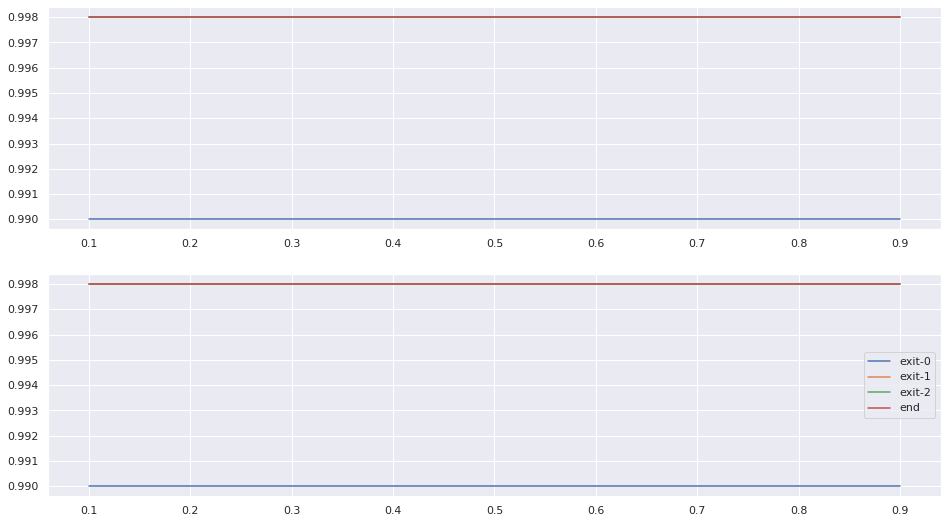

In [32]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_exit_acc:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

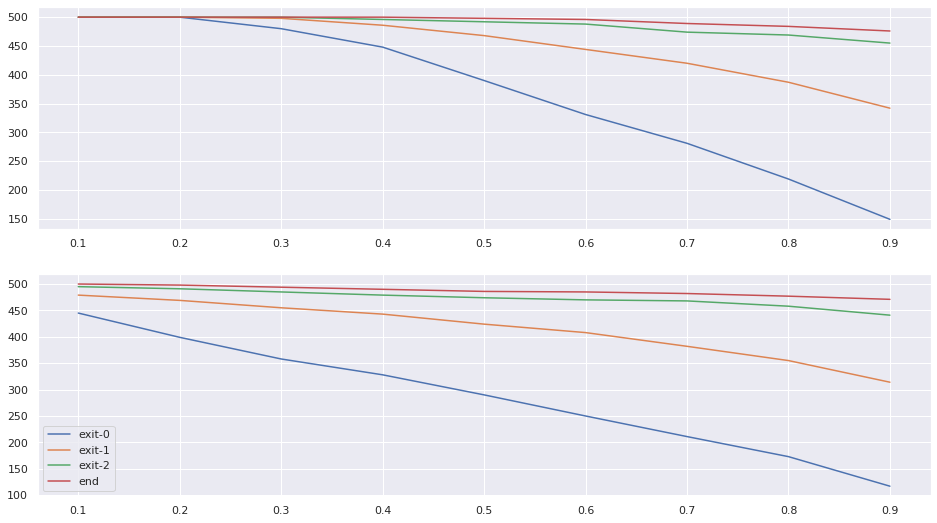

In [34]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_num_exited_at_exit:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_num_exited_at_exit:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

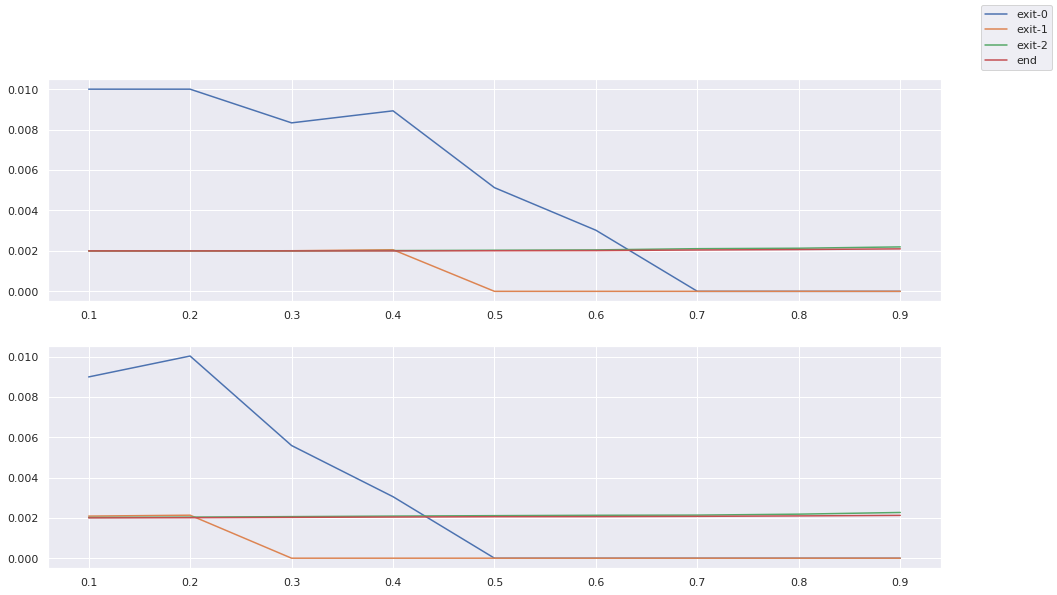

In [35]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_false_if_exited:
    axes[0].plot(x, data)

for data in sm_false_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## accuracy only if exited

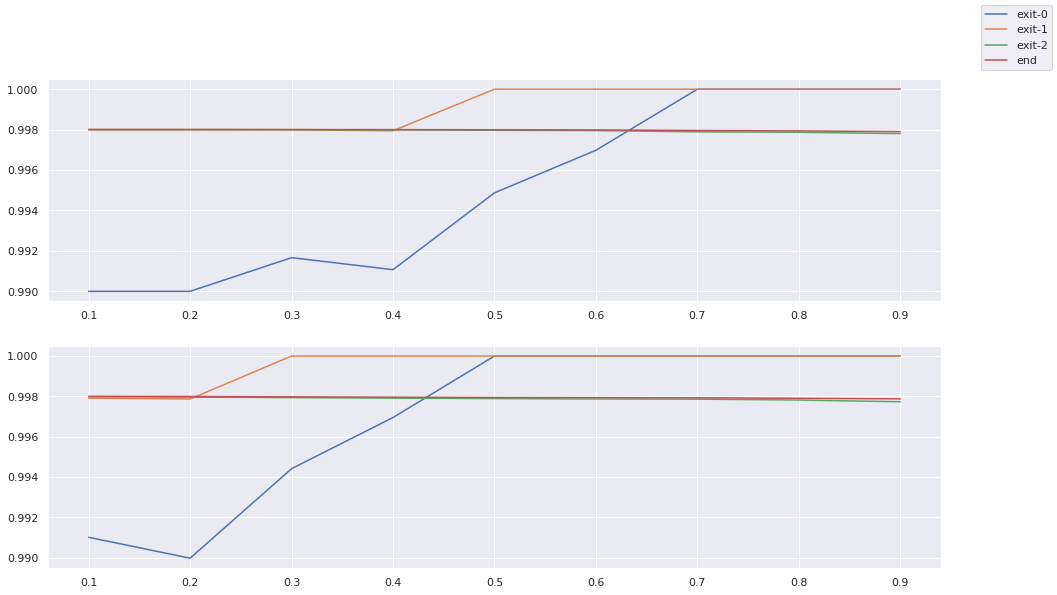

In [36]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc_if_exited:
    axes[0].plot(x, data)

for data in sm_exit_acc_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

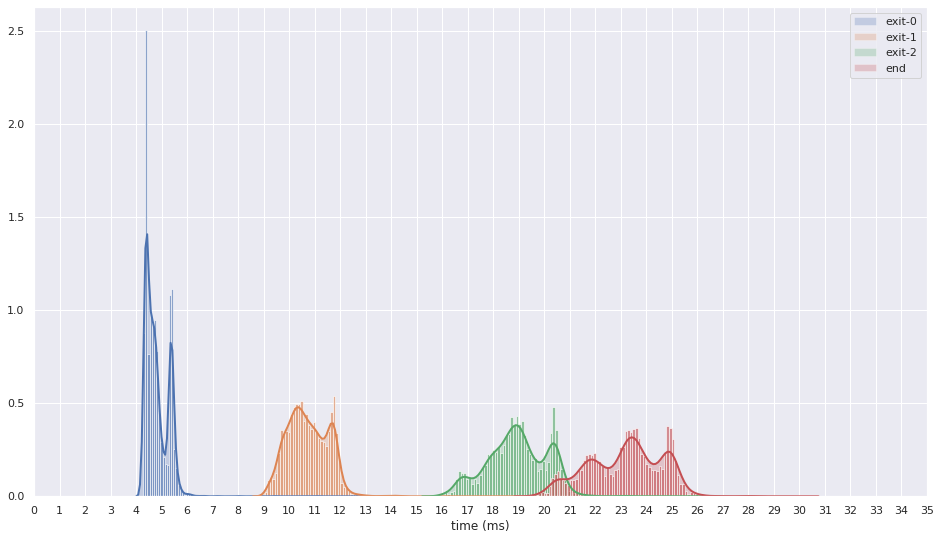

In [111]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
plt.figure(figsize=(16,9))
for exit in range(0,4):
    sns.distplot(th_time[exit][0][1:4500], **kwargs)
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.xlabel('time (ms)')
plt.xticks(list(range(0,36,1)))
plt.show()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]